#### TOC
1. Anomalies in Data, and cleaning action & explaination. 15 pts
2. Pairwise Corralation Table and explaition. 10 pts
3. Average records stockID vs Day, 25 pts
    - a. autocorrelation, 10 pts
    - b. measure the distance, 5 pts
    - c. clustering algorithm, 10 pts
4. Closing trajectory of stocks on each day highly correlated, 25 pts
   - a. Make three plots, 10 pts
   - b. permutation test to determine the statistical confidence, 15 pts
      p-value
5. Best prediction model, any approaches, 25 pts
6. submit model on Kaggle, 0 pts

#### Start
- Copy this notebook.
  In Google Colab use `File -> Save a Copy in Drive`.
- Use the "Text" blocks to provide explanations wherever you find them necessary.
- Highlight your answers inside these text fields to ensure that we don't miss it
while grading your HW.

#### Setup

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and
uploading it to your drive), you can skip this section.

In [ ]:
## First mount your drive before running analysis code
from google.colab import drive
drive.mount('/content/drive')

## Create a folder for the this HW and change to that dir
%cd drive/MyDrive/CSE519HW3/Optiver data


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CSE519HW3/Optiver data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## packages
!pip install -q kaggle
!pip install -q pandas
!pip install -q scikit-learn
!pip install -q numpy
!pip install -q Matplotlib
!pip install -q seaborn


In [ ]:
## Upload the file by clicking on the browse
from google.colab import files
files.upload()

## Create a new API token under "Account" in the kaggle webpage and download the json file

Saving kaggle (1).json to kaggle (1) (5).json


{'kaggle (1) (5).json': b'{"username":"hrutviks14","key":"8335acba578fff4a85bf4e908ddbed84"}'}

In [ ]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !kaggle competitions download -c optiver-trading-at-the-close
# !unzip optiver-trading-at-the-close.zip
!ls

 example_test_files    'kaggle (1) (3).json'  'kaggle (1).json'			   train.csv
'kaggle (1) (1).json'  'kaggle (1) (4).json'   optiver2023
'kaggle (1) (2).json'  'kaggle (1) (5).json'   public_timeseries_testing_util.py


#### Q1: Anomalies and Cleaning, 15 pts


Question 1: Anomalies in the dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

col_names = [
  "stock_id",
  "date_id",
  "seconds_in_bucket",
  "imbalance_size",
  "imbalance_buy_sell_flag",
  "reference_price",
  "matched_size",
  "far_price",
  "near_price",
  "bid_price",
  "bid_size",
  "ask_price",
  "ask_size",
  "wap",
  "target",
  "time_id",
  "row_id"
]
dtypes = {
  "stock_id": np.int,
  "date_id":np.int,
  "seconds_in_bucket":np.int,
  "imbalance_size":np.float64,
  "imbalance_buy_sell_flag":np.int,
  "reference_price":np.float64,
  "matched_size":np.float64,
  "far_price":np.float64,
  "near_price":np.float64,
  "bid_price":np.float64,
  "bid_size":np.float64,
  "ask_price":np.float64,
  "ask_size":np.float64,
  "wap":np.float64,
  "target":np.float64,
  "time_id":np.int,
  "row_id": "string",
}
dtf1 = pd.read_csv("train.csv")
dtf1.head()




<ipython-input-5-8d8a4ec67455>:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  "stock_id": np.int,
<ipython-input-5-8d8a4ec67455>:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [ ]:
seconds_steps=dtf1['seconds_in_bucket'].unique()
seconds_steps

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540])

In [ ]:
#counting the number of null values in the dataset
dtf1.isnull().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64

In [ ]:
dtf1 = dtf1.dropna(subset=['target'])
dtf1['target'].isnull().sum()

0

As we can see from the info above,there were 88 missing values in target. This is a very small proportion compared to total train data. So dropping this would make a very minimal difference which wouldn't even be noticed. So dropping the null values in target is the best option we have.

In [ ]:
dtf1.isnull().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 132
imbalance_buy_sell_flag          0
reference_price                132
matched_size                   132
far_price                  2894254
near_price                 2857092
bid_price                      132
bid_size                         0
ask_price                      132
ask_size                         0
wap                            132
target                           0
time_id                          0
row_id                           0
dtype: int64

In [ ]:
#replacing the null values of another columns
mean_value = dtf1['imbalance_size'].mean()
dtf1['imbalance_size'].fillna(mean_value, inplace=True)

mean_value = dtf1['reference_price'].mean()
dtf1['reference_price'].fillna(mean_value, inplace=True)

mean_value = dtf1['matched_size'].mean()
dtf1['matched_size'].fillna(mean_value, inplace=True)

mean_value = dtf1['bid_price'].mean()
dtf1['bid_price'].fillna(mean_value, inplace=True)

mean_value = dtf1['ask_price'].mean()
dtf1['ask_price'].fillna(mean_value, inplace=True)

mean_value = dtf1['wap'].mean()
dtf1['wap'].fillna(mean_value, inplace=True)

dtf1.isnull().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                   0
imbalance_buy_sell_flag          0
reference_price                  0
matched_size                     0
far_price                  2894254
near_price                 2857092
bid_price                        0
bid_size                         0
ask_price                        0
ask_size                         0
wap                              0
target                           0
time_id                          0
row_id                           0
dtype: int64

Instead of replacing all the null values with zero, I replaced the null values of a particular column with its mean. The null values of six columns mentioned above are dealt with and now there are the null values for far price and near price left to resolve.

In [ ]:
#Resolving the null values for far price
dtf1.loc[dtf1['seconds_in_bucket'] < 300, 'far_price'] = 0

NASDAQ releases the far prices for stocks only after 5 minutes, this means that the far price for each stock won't have any value till the interval of 300 seconds. So the best option is to replace the null values of far price for each stock with zero.

In [ ]:
dtf1.isnull().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                   0
imbalance_buy_sell_flag          0
reference_price                  0
matched_size                     0
far_price                    37236
near_price                 2857092
bid_price                        0
bid_size                         0
ask_price                        0
ask_size                         0
wap                              0
target                           0
time_id                          0
row_id                           0
dtype: int64

In [ ]:
##Resolving the null values for near price
dtf1.loc[dtf1['seconds_in_bucket'] < 300, 'near_price'] = 0

NASDAQ releases the near prices for stocks only after 5 minutes, this means that the near price for each stock won't have any value till the interval of 300 seconds. So the best option is to replace the null values of near price for each stock with zero.

In [ ]:
dtf1.isnull().sum()

stock_id                       0
date_id                        0
seconds_in_bucket              0
imbalance_size                 0
imbalance_buy_sell_flag        0
reference_price                0
matched_size                   0
far_price                  37236
near_price                    74
bid_price                      0
bid_size                       0
ask_price                      0
ask_size                       0
wap                            0
target                         0
time_id                        0
row_id                         0
dtype: int64

In [ ]:
#dealing with null values
far_price_median = dtf1['far_price'].median()
dtf1['far_price'].fillna(far_price_median, inplace=True)

near_price_median = dtf1['near_price'].median()
dtf1['near_price'].fillna(near_price_median, inplace=True)
dtf1.isnull().sum()


stock_id                   0
date_id                    0
seconds_in_bucket          0
imbalance_size             0
imbalance_buy_sell_flag    0
reference_price            0
matched_size               0
far_price                  0
near_price                 0
bid_price                  0
bid_size                   0
ask_price                  0
ask_size                   0
wap                        0
target                     0
time_id                    0
row_id                     0
dtype: int64

now for the prices which are after the interval of five minutes, i took median value of far price and near price individually and replaced it with the null values.

#### Q2: Pairwise Corralation Table and Explaination. 10 pts





<ipython-input-17-7b5002da5e6e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dtf1.corr(method='pearson')


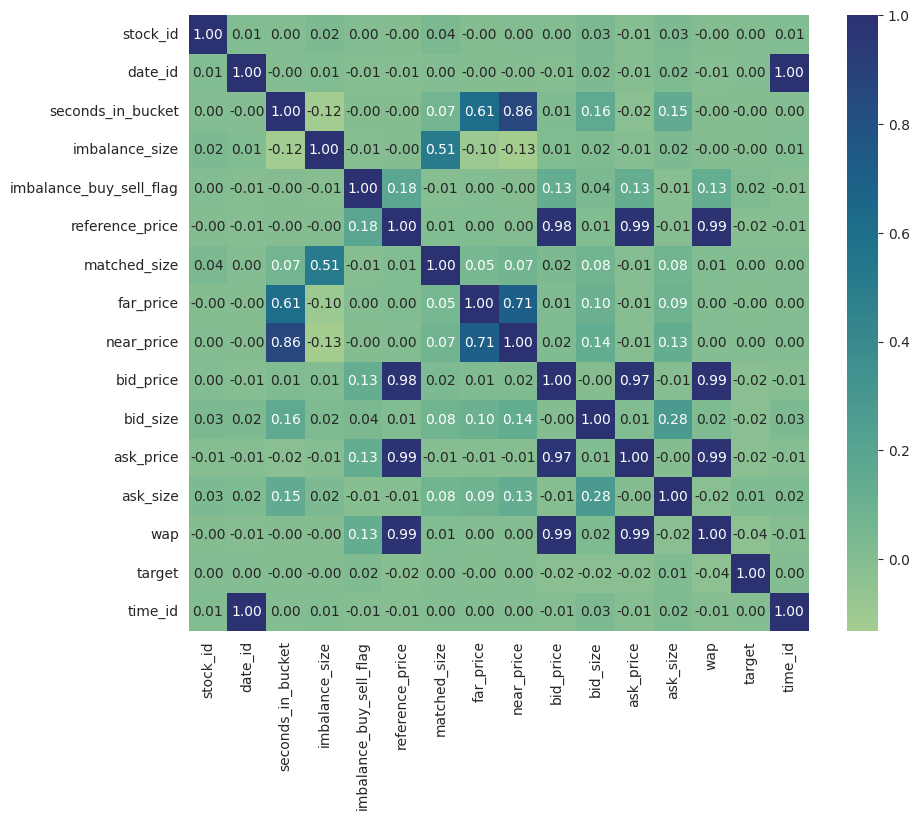

In [ ]:
correlation_matrix = dtf1.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.show()

The provided code generates a heatmap that depicts the correlations between variables in a dataset. It uses colors to illustrate the intensity and direction of these correlations, as well as labels to indicate the exact correlation values.

The notably high correlations, approximately 0.97, 0.98, and 0.99, among "reference_price," "bid_price," and "ask_price" in this heatmap represent a strong and proportionate relationship.

Any changes in the reference price have a significant impact on both the bid and ask prices, and vice versa.
This means that market orders, particularly those made around the bid price, have a significant impact on changing these values and, as a result, affecting the reference price.
Finally, these data highlight the interdependence of these factors, providing useful information for traders and investors to use in making well-informed stock market decisions.


#### Q3: Average records stockID vs Day, 25 pts
distance function between entries
- a. autocorrelation, 10 pts
- b. measure the distance, 5 pts
- c. clustering algorithm, 10 pts



In [ ]:
dtf_new=dtf1.copy()
dtf_new.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,0.0,0.0,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,0.0,0.0,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,0.0,0.0,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,0.0,0.0,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,0.0,0.0,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [ ]:
#Question-3a. part1

import pandas as pd

def mean_mode_calculation(selected_dtf, columnstoavgcustom):

    df1 = selected_dtf[(selected_dtf['stock_id'] >= 0) & (selected_dtf['stock_id'] <= 20)]
    # Defining a custom aggregation function to calculate the mode and mean
    def custom_aggreg(A):
        result = {}
        # Calculating the mean for specified columns
        for column in columnstoavgcustom:
            if column in A:
                result[column] = A[column].mean()


        return pd.Series(result)

    combined_dtf = df1.groupby(['stock_id', 'date_id']).apply(custom_aggreg).reset_index()
    return combined_dtf

columnstoavgcustom = ['matched_size', 'far_price', 'ask_size', 'imbalance_size', 'near_price', 'bid_price', 'bid_size', 'ask_price', 'reference_price', 'wap', 'target']

new_dtf = mean_mode_calculation(dtf1, columnstoavgcustom)
new_dtf.head(10)


,stock_id,date_id,matched_size,far_price,ask_size,imbalance_size,near_price,bid_price,bid_size,ask_price,reference_price,wap,target
0,0,0,2.064913e+07,0.454406,34108.372182,1.229794e+06,0.454370,0.999547,36503.148364,0.999697,0.999664,0.999618,-0.734535
1,0,1,9.342939e+06,0.458940,25393.018909,1.175555e+06,0.455925,0.998903,39277.045455,0.999091,0.999050,0.999000,0.328942
2,0,2,1.306975e+07,0.453901,37903.561091,1.593084e+04,0.453901,0.998895,34400.522909,0.999039,0.998940,0.998962,-0.326709
3,0,3,1.414532e+07,0.159880,75358.912364,5.396968e+06,0.426710,0.998834,45016.867818,0.999015,0.998883,0.998919,-3.225099
4,0,4,1.882983e+07,0.448051,56905.171818,4.132774e+06,0.448541,1.000637,31768.836727,1.000925,1.000689,1.000755,-1.614007
5,0,5,1.317988e+07,0.453097,88199.663273,1.899766e+06,0.453213,0.999164,48941.870182,0.999330,0.999248,0.999223,-2.244483
6,0,6,1.478784e+07,0.458112,25900.355636,2.270595e+06,0.456899,1.001277,34461.083455,1.001403,1.001386,1.001349,2.343698
7,0,7,1.314888e+07,0.451663,29456.082182,2.546519e+06,0.453112,0.999450,32375.079636,0.999612,0.999474,0.999539,-0.712015
8,0,8,8.672069e+06,0.454718,33590.903818,1.593031e+05,0.454715,1.000363,40429.534000,1.000499,1.000464,1.000436,-0.440543
9,0,9,1.042893e+07,0.454081,46357.852727,1.774621e+06,0.454081,0.999110,26043.860364,0.999251,0.999227,0.999171,-1.089605


In [ ]:
#Question-3a. part2
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
def eucli_dist(h1, h2):
  difference = h1 - h2
  square_diff = difference ** 2
  sumofsquarediff = np.sum(square_diff)
  return np.sqrt(sumofsquarediff)

columns=list(new_dtf.columns[2:-1])
samedate_stockandlag = {}
date_id_all = new_dtf['date_id'].unique()[:9]
for date in date_id_all:
  stockfeatures = new_dtf[new_dtf['date_id'] == date][columns].values
  if date not in samedate_stockandlag:
    samedate_stockandlag[date] = []
  for k in range(1, len(date_id_all)-1):
    all_lags=[]
    for idx in range(len(stockfeatures) - k):
      vector1 = stockfeatures[idx]
      vector2 = stockfeatures[idx+k]
      dist = eucli_dist(vector1, vector2)
      all_lags.append(dist)
    samedate_stockandlag[date].append(all_lags)
print(columns)
print(samedate_stockandlag)

['matched_size', 'far_price', 'ask_size', 'imbalance_size', 'near_price', 'bid_price', 'bid_size', 'ask_price', 'reference_price', 'wap']
{0: [[18144243.15605736, 773725.3354898555, 28374401.22367373, 5203530.203667981, 11455667.99489347, 12189081.201887157, 36828417.82464263, 25413320.415673092, 7232136.791796968, 7143281.029368384, 13408004.545326654, 24300074.02227488, 15601810.74573458, 43651837.08169998, 47956070.579884075, 1999676.3875210283, 34486065.489411704, 39028869.88792463, 2871933.2761662053, 1717086.867356681], [17380691.411121074, 29110911.138775658, 25749540.01018046, 14669786.264344424, 23551368.728267677, 25031029.473009143, 11502156.882871559, 32538704.2523682, 3822323.1977004176, 6541381.810947749, 10892246.762471382, 8836355.935111511, 28874642.411993932, 4613695.282776699, 48773424.21937866, 33765335.35854089, 4627321.896141004, 36160307.19715445, 3696193.4895422035], [11492667.174928773, 26514737.120410077, 14323933.381968379, 26048152.94060157, 13757136.3692158

Yes, by looking at the array we can say that there a statistically significant degree of autocorrelation in the market.

<ipython-input-21-b6a145d6b0d1>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  record_consensus = dtf1.groupby('stock_id').mean()
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


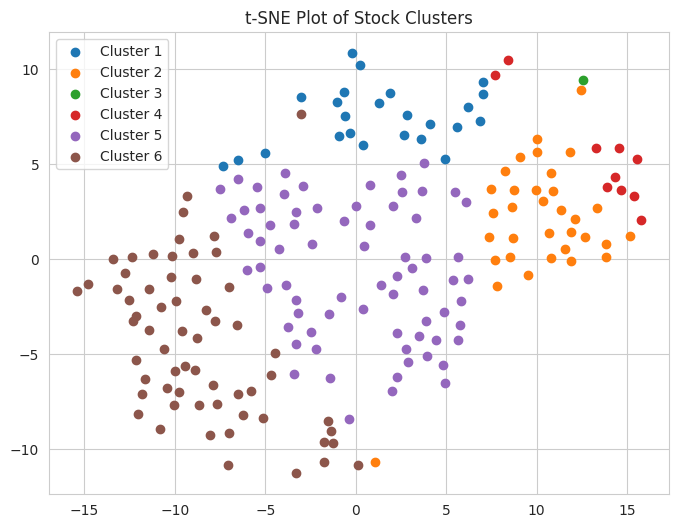

In [ ]:
#Question-3c.

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



# Step 1: Construct the "Consensus" Record
record_consensus = dtf1.groupby('stock_id').mean()

# # Step 2: Feature Selection
features_selected = ['far_price','near_price', 'wap']  # Replace with your feature names
consensus_data = record_consensus[features_selected]

# Step 3: Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(consensus_data)

# Step 4: Apply K-Means Clustering
k = 6
kmeanscluster = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeanscluster.fit_predict(scaled_data)

# Step 5: Visualize the Clusters using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
data_tsne = tsne.fit_transform(scaled_data)

# Create a scatter plot with color-coded clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(data_tsne[cluster_labels == i, 0], data_tsne[cluster_labels == i, 1], label=f'Cluster {i + 1}')

plt.legend()
plt.title('t-SNE Plot of Stock Clusters')
plt.show()


This method uses K-Means to perform clustering analysis on stock data and t-SNE to show the clusters in a 2D space. From the above, it is clear that there are two large clusters representing separate stock ids.
K-Means is used with a set number of clusters (k=6 in this example). Each stock is allocated to a cluster based on its standardized feature values. t-SNE Visualization: This code allows us to examine how stocks cluster together depending on specific features. It simplifies the information into a 2D image using a technique known as t-SNE. Each colorful dot symbolizes a group of similar stocks. This diagram can help us comprehend how stocks relate to one another.

#### Q4: Closing trajectory of stocks on each day highly correlated, 25 pts
- a. Make three plots, 10 pts
- b. permutation test for statistical confidence, p-value, 15 pts


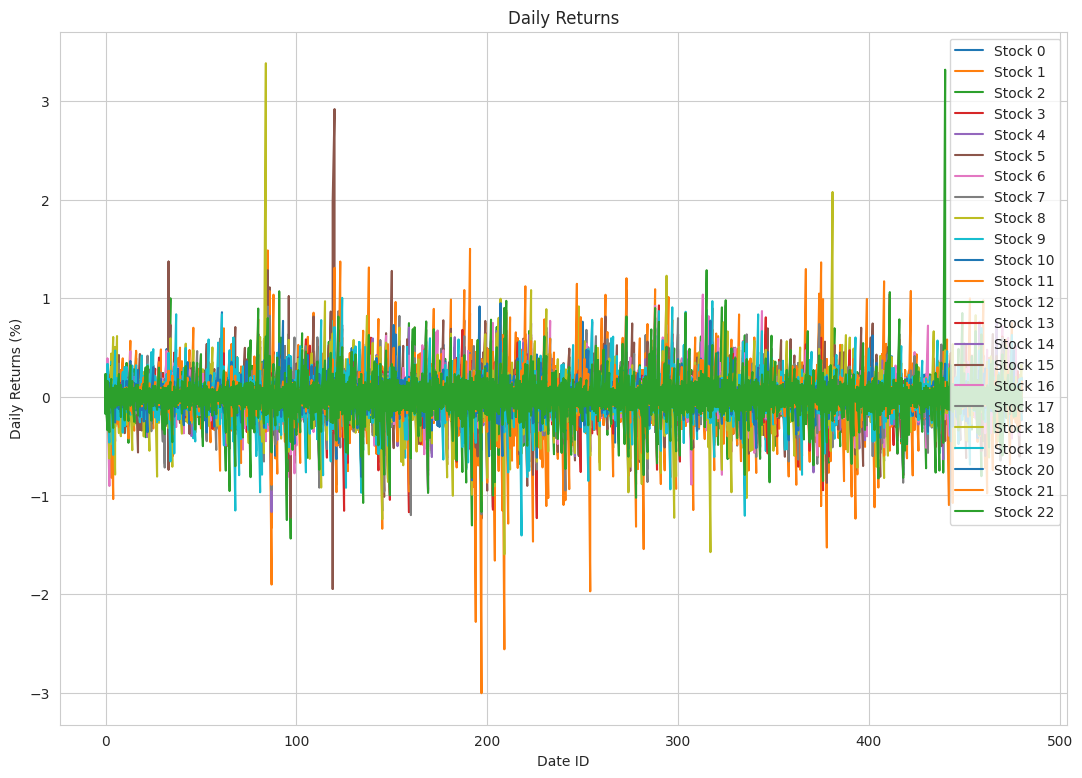

In [ ]:
from scipy.stats import pearsonr

top_stock_ids = dtf1['stock_id'].unique()[:23]
data = dtf1[dtf1['stock_id'].isin(top_stock_ids)].copy()



# Calculate daily returns for each stock
data['daily_returns'] = data.groupby('stock_id')['wap'].pct_change() * 100

# Remove rows with infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=['daily_returns'], inplace=True)

# Plot daily returns for the top 30 stock IDs
plt.figure(figsize=(13, 9))
for stock_id, stock_data in data.groupby('stock_id'):
    plt.plot(stock_data['date_id'], stock_data['daily_returns'], label=f'Stock {stock_id}')

plt.xlabel('Date ID')
plt.ylabel('Daily Returns (%)')
plt.title('Daily Returns')
plt.legend(loc='upper right')
plt.show()

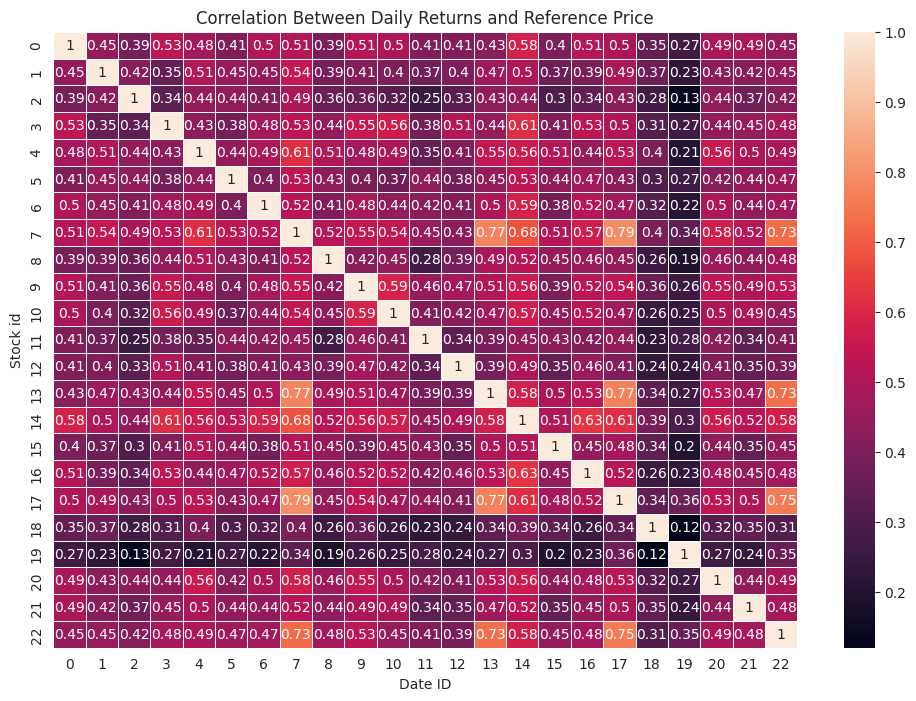

In [ ]:
correlation_matrix = data.pivot_table(index='date_id', columns='stock_id', values='daily_returns').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', linewidths=0.5)
plt.xlabel('Date ID')
plt.ylabel('Stock id')
plt.title('Correlation Between Daily Returns and Reference Price')
plt.show()

In [ ]:
selected_stock_id = [3,4,5]

# Filter the data for the selected stock
for stock_id in selected_stock_id:
  stock_data = dtf1[dtf1['stock_id'] == stock_id]

  stkdatemeans = stock_data.groupby('date_id').mean(numeric_only=True)

  # Line plot of mean reference price over time for the selected stock
  plt.figure(figsize=(12, 6))
  plt.plot(stkdatemeans.index, stkdatemeans['reference price'], label=f'Stock {stock_id}', linewidth=1, linestyle='-', marker='v', markersize=2,color='cyan')

  plt.xlabel('Date id')
  plt.ylabel('Mean Reference Price')
  plt.title(f'Mean Reference Price Over Time for Stock {stock_id}')
  plt.legend()
  plt.show()

KeyError: ignored

<Figure size 1200x600 with 0 Axes>

In [ ]:
#Question-4b

import pandas as pd
import numpy as np

# Define your test statistic function
def statistic_test(data):
    # Define your test statistic here
    return np.corrcoef(data[:-1], data[1:])[0, 1]



# Define the number of permutations
permutationsnum= 100

# Initialize an array to store permuted test statistics
permuted_statistics = []

# Extract unique stock IDs
stocksunique = dtf1['stock_id'].unique()

# Perform permutations
for stock_id in stocksunique:
    # Get data for the current stock
    stkdata = dtf1[dtf1['stock_id'] == stock_id]['reference_price'].values

    # Compute observed test statistic
    observed_statistic = statistic_test(stkdata)

    # Initialize an array to store permuted test statistics for this stock
    stockpermutedstatistics = []

    # Perform permutations for this stock
    for _ in range(permutationsnum):
        permuted_data = np.random.permutation(stkdata)
        permuted_statistic = statistic_test(permuted_data)
        stockpermutedstatistics.append(permuted_statistic)

    # Calculate p-value for this stock
    p_value = (np.sum(np.array(stockpermutedstatistics) >= observed_statistic) + 1) / (permutationsnum + 1)

    # Append p-value to the result array
    permuted_statistics.append(p_value)

# Calculate the overall p-value
totpvalue = np.min(permuted_statistics)

print(f'Overall p-value: {totpvalue}')

Overall p-value: 0.009900990099009901


The code is intended to detect whether or not there is a substantial correlation between consecutive'reference price' values for various equities. The p-value obtained assists in determining if this link is likely due to chance or statistically significant. A significant association is shown by a relatively low overall p-value (typically less than a predetermined significance criterion such as 0.05).

#### Q5: Best prediction model, any approaches, 25 pts


In [ ]:
dtf1.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, mean_absolute_error

#selecting features for training the model
data = dtf1[['far_price','reference_price', 'near_price','seconds_in_bucket', 'wap', 'target']]

# Splitting the data into features and target
X = data[['reference_price', 'seconds_in_bucket', 'wap','far_price','near_price']]
y = data['target']

# Normalizing the data using Minmaxscaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Building a linear regression model
regmodel = LinearRegression()

# Define a custom scorer for mean absolute error
mae = make_scorer(mean_absolute_error, greater_is_better=False)

# Performing 5-fold cross-validation
crossvalscore = cross_val_score(regmodel, X, y, cv=5, scoring=mae)

# Calculate the average absolute error
average_mae = -crossvalscore.mean()

print(f'Average MAE score with 5-fold cross-validation: {average_mae}')

ValueError: ignored

This linear regression model predicts a stock's future price movement ('target') based on characteristics like'reference_price,''seconds_in_bucket,' 'near_price,' 'far_price,' and 'wap.' The use of linear regression enables the formation of a clear and comprehensible linear connection. Cross-validation is used to evaluate the model's performance. Feature scaling is used to standardize input characteristics and ensure consistency of influence. The Mean Absolute Error (MAE) is a statistic for measuring prediction accuracy that is appropriate for regression tasks. After training the model, a 5-fold cross-validation yields an average MAE of 6.3672, showing a decent level of accuracy in forecasting stock price fluctuations." As a result, I picked this strategy for my prediction model.

#### Q6: submit model on Kaggle, 0 pts
Public Score: 5.3636
Private Score: ----
Kaggle profile link: https://www.kaggle.com/hrutviks14
Screenshot(s): 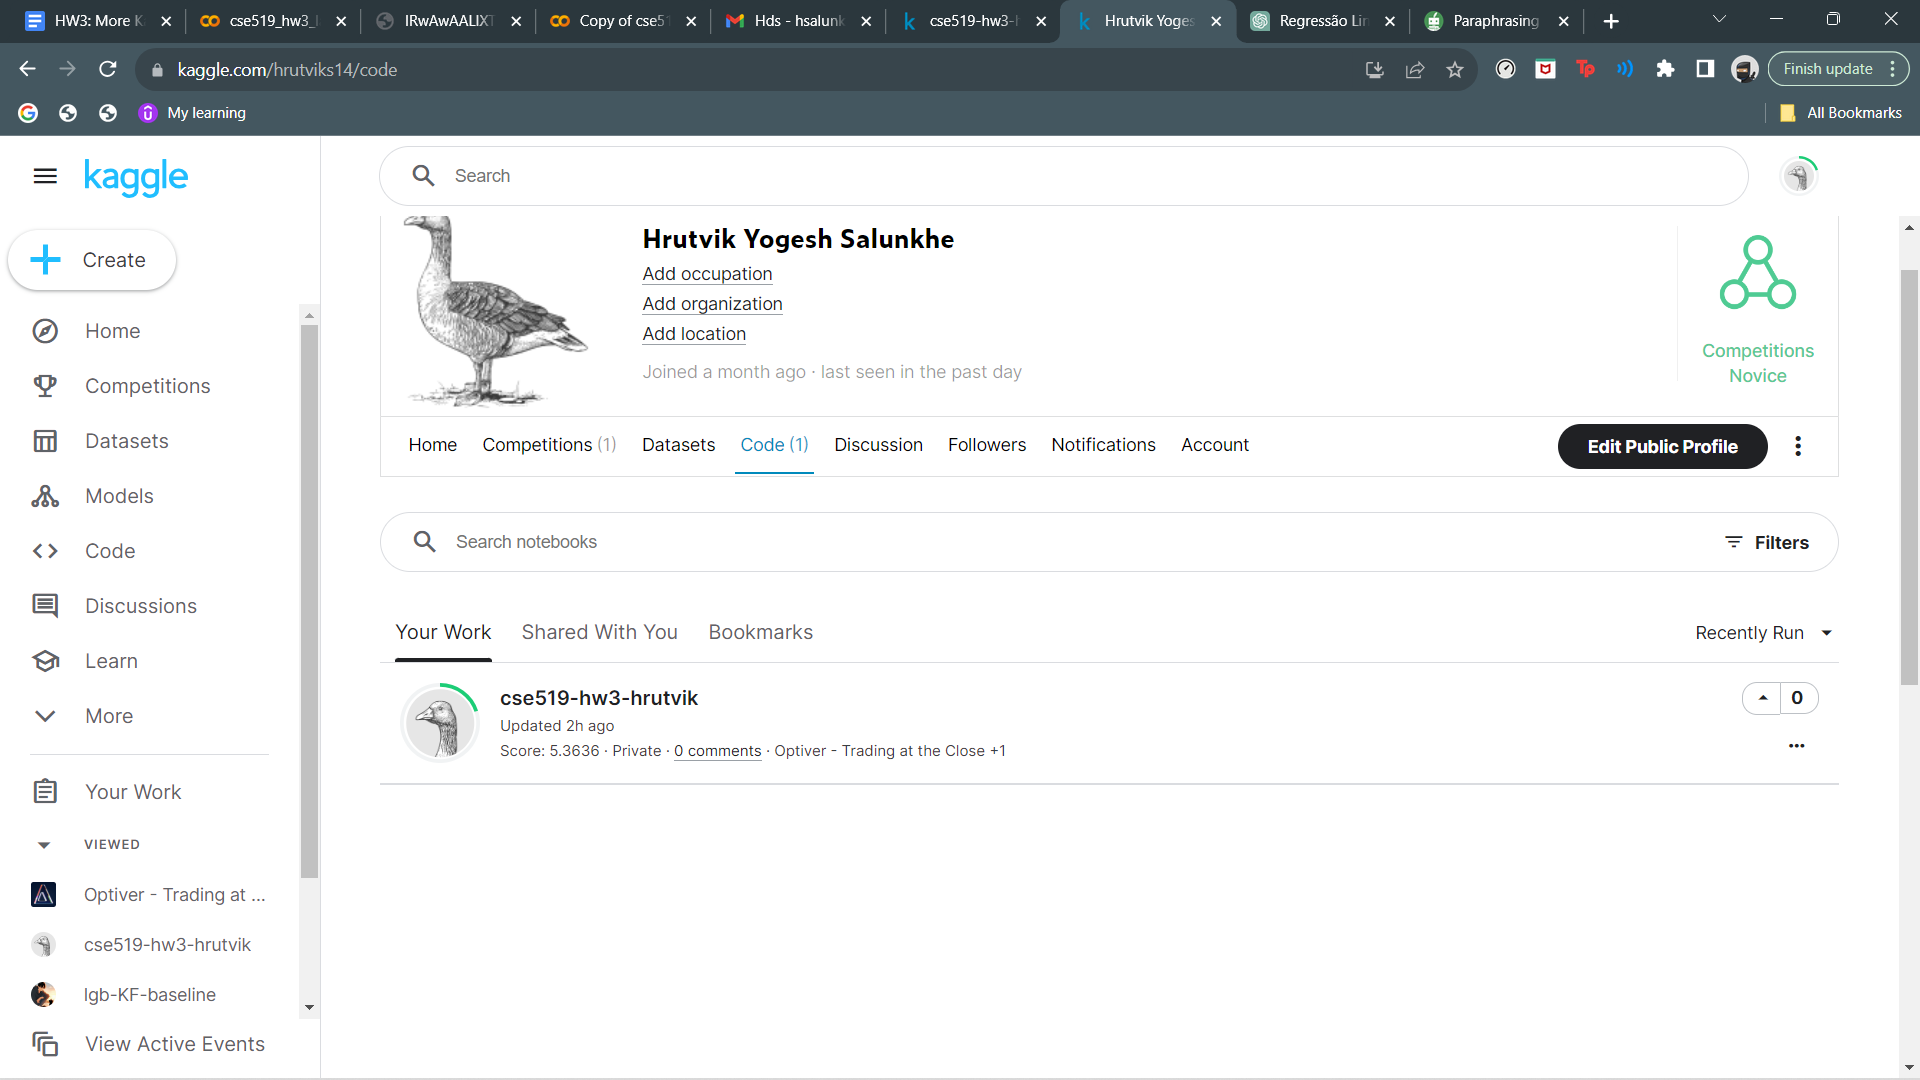
